In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
data = pd.read_csv("census_income_dataset.csv",na_values=['?',-10000])

In [35]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

In [36]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
data.drop(["fnlwgt"],axis=1, inplace=True)

In [38]:
data.drop(["education"],axis=1, inplace=True)

In [39]:
data.drop(["race"],axis=1, inplace=True)

In [40]:
num_var=list(data.dtypes[data.dtypes!=object].index)
num_var

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [41]:
cat_var=list(data.dtypes[data.dtypes==object].index)
cat_var

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'sex',
 'native_country',
 'income_level']

In [42]:
for col in cat_var:
    data[col].fillna(data[col].mode()[0],inplace=True)
for col in num_var:
    data[col].fillna(data[col].mean(),inplace=True)

In [43]:
#Non-object types
X=data[num_var]
Y=data["income_level"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [44]:
scaled_X_train=StandardScaler().fit(X_train).transform(X_train)

In [45]:
model=RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.8276047398459294

In [46]:
pd.Series(model.feature_importances_, index=X.columns)

age               0.296704
education_num     0.194297
capital_gain      0.239873
capital_loss      0.092628
hours_per_week    0.176497
dtype: float64

In [47]:
#Object types
cat_var.remove("income_level")
X=data[cat_var]
Y=data["income_level"]
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [48]:
data.workclass.value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [49]:
for variable in cat_var:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
X.count(axis='columns')

0        78
1        78
2        78
3        78
4        78
         ..
48837    78
48838    78
48839    78
48840    78
48841    78
Length: 48842, dtype: int64

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [52]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

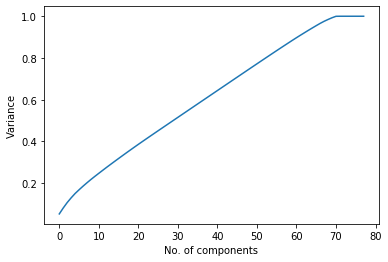

In [29]:
from sklearn.decomposition import PCA
pca=PCA().fit(scaled_X_train)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel('No. of components')
plt.ylabel('Variance')
plt.plot(list(range(0,78)),np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05284665, 0.08133023, 0.10728612, 0.12989196, 0.15059986,
       0.16846282, 0.18564815, 0.20197509, 0.21777546, 0.23283004,
       0.24747683, 0.26199621, 0.27641898, 0.29052627, 0.30455882,
       0.31842249, 0.33219397, 0.34592424, 0.35941314, 0.37287095,
       0.38619974, 0.39933974, 0.41241668, 0.4254429 , 0.43838476,
       0.45129002, 0.46416028, 0.47702352, 0.48988242, 0.5027357 ,
       0.51558545, 0.52843058, 0.54127372, 0.55411458, 0.56695417,
       0.57979123, 0.59262706, 0.60546186, 0.61829652, 0.63112823,
       0.64395975, 0.65679017, 0.66961818, 0.68244542, 0.69526926,
       0.70808537, 0.72089913, 0.73370589, 0.74648819, 0.75924735,
       0.77199102, 0.78471328, 0.79741874, 0.81008736, 0.82274075,
       0.83534052, 0.84785847, 0.86029622, 0.87269619, 0.8850278 ,
       0.89714172, 0.90904403, 0.92071692, 0.93236346, 0.94370948,
       0.95490287, 0.96582624, 0.97581588, 0.9846073 , 0.9927836 ,
       0.999735  , 1.        , 1.        , 1.        , 1.     

In [31]:
"""pca=PCA(n_components=73)
scaled_X_train=pca.fit_transform(scaled_X_train)
scaled_X_test=pca.transform(scaled_X_test)"""

In [53]:
model=RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.8121209019015688

In [54]:
model.feature_importances_


array([9.52770366e-03, 7.66947447e-03, 1.78525544e-04, 1.83395076e-02,
       1.72410170e-02, 1.56609166e-02, 6.10456882e-03, 5.17679924e-04,
       1.61604722e-02, 6.51393978e-04, 1.85824154e-01, 2.54100701e-03,
       7.04550955e-02, 4.89079155e-03, 4.84897910e-03, 8.65151102e-03,
       3.72905019e-04, 1.73003940e-02, 7.78863806e-02, 1.46701714e-02,
       1.35969246e-02, 1.60156892e-02, 3.22160683e-02, 7.09766201e-04,
       4.26520050e-02, 4.73015528e-03, 1.46864523e-02, 1.01385089e-02,
       1.15122357e-02, 1.25705213e-01, 3.13414833e-02, 6.35185349e-03,
       3.69508472e-02, 1.50900211e-02, 2.76640302e-02, 2.31308169e-02,
       2.50032947e-02, 1.34329892e-03, 4.43512800e-03, 2.16787078e-03,
       1.31965682e-03, 2.38955339e-03, 1.65296064e-03, 6.02552933e-04,
       1.36622571e-03, 2.85505795e-03, 1.25429439e-03, 3.67317337e-03,
       1.77014857e-03, 8.58575984e-04, 1.06551325e-03, 1.02889331e-08,
       1.01556154e-04, 5.75243855e-04, 1.31230948e-03, 3.37442070e-03,
      

In [55]:
pd.Series(model.feature_importances_, index=X.columns)

workclass_Federal-gov             0.009528
workclass_Local-gov               0.007669
workclass_Never-worked            0.000179
workclass_Private                 0.018340
workclass_Self-emp-inc            0.017241
                                    ...   
native_country_Thailand           0.000446
native_country_Trinadad&Tobago    0.000441
native_country_United-States      0.010624
native_country_Vietnam            0.001300
native_country_Yugoslavia         0.000977
Length: 78, dtype: float64

In [57]:
finalvars=[]
for x in num_var:
    finalvars.append(x)

for x in cat_var:
    finalvars.append(x)
finalvars

['age',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass',
 'marital_status',
 'occupation',
 'relationship',
 'sex',
 'native_country']

In [61]:
X=data[finalvars]
Y=data["income_level"]
for variable in cat_var:
    X[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=100,test_size=0.2)
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

C:\Users\ARAVIND NACHIAPPAN\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [62]:
n_trees=[30,50,100,150,200,1000,2000,3000]
for trees in n_trees:
    model=RandomForestClassifier(n_estimators=trees,n_jobs=-1,oob_score=True)
    model.fit(scaled_X_train,Y_train)
    print(trees,' trees')
    OOB=model.oob_score_
    print('OOB Score: ',OOB)

30  trees
OOB Score:  0.8446753512655798
50  trees
OOB Score:  0.846313310982008
100  trees
OOB Score:  0.8489494024006347
150  trees
OOB Score:  0.8483863537481126
200  trees
OOB Score:  0.8495124510531569
1000  trees
OOB Score:  0.8500243134645408
2000  trees
OOB Score:  0.8501266859468175
3000  trees
OOB Score:  0.850331430911371


In [63]:
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1,min_samples_leaf=min_samples)
    #model.fit(X, y)
    model.fit(scaled_X_train, Y_train)
    print(min_samples, "min samples")
    OOB = model.oob_score_
    print('OOB: ', OOB)

1 min samples
OOB:  0.8488726230389272
2 min samples
OOB:  0.8641005297775958
3 min samples
OOB:  0.8644844265861337
4 min samples
OOB:  0.8632559567988125
5 min samples
OOB:  0.8631535843165357
6 min samples
OOB:  0.8630256187136898
7 min samples
OOB:  0.8620274870114913
8 min samples
OOB:  0.8619763007703529
9 min samples
OOB:  0.8617715558057994
10 min samples
OOB:  0.8608757965858778


In [64]:
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1,min_samples_leaf=5,max_features=max_features)
    model.fit(scaled_X_train,Y_train)
    print(max_features, "No_Of_features")
    OOB = model.oob_score_
    print('OOB: ', OOB)

auto No_Of_features
OOB:  0.8630256187136898
None No_Of_features
OOB:  0.8611061346710004
sqrt No_Of_features
OOB:  0.8629744324725513
log2 No_Of_features
OOB:  0.8605942722596166
0.9 No_Of_features
OOB:  0.8608757965858778
0.2 No_Of_features
OOB:  0.8649195096358099
1 No_Of_features
OOB:  0.7877818442402682


In [65]:
model = RandomForestClassifier(n_estimators=200, 
                              oob_score=True, 
                              n_jobs=-1,  
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(scaled_X_train,Y_train)
model.oob_score_

0.8636142604867811

In [66]:
pred=model.predict(scaled_X_test)

In [67]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, pred))

[[7073  342]
 [ 948 1406]]


In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, pred))

0.8679496366055891
